In [1]:
import rioxarray
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
from geocube.vector import vectorize
import dask
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from dask.distributed import Client
client = Client()

/Users/marthamorrissey/mambaforge/envs/redwood-dev/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52477 instead
  warnings.warn(


In [3]:
dset = rioxarray.open_rasterio('/Users/marthamorrissey/Downloads/simple_dist_stack_Southern_Rockies.tif',
                               band_as_variable=True)

In [4]:
co_boundary = gpd.read_file('/Users/marthamorrissey/Downloads/Colorado_State_Boundary.geojson')
co_boundary_reproject = co_boundary.to_crs(dset.rio.crs)

In [9]:
southern_rockies = gpd.read_file('/Users/marthamorrissey/Downloads/southern_rockies_eco.geojson')

southern_rockies_reproject = southern_rockies.to_crs(dset.rio.crs)

In [6]:
dset_clipped = dset.rio.clip_box(*co_boundary_reproject.total_bounds)

In [10]:
dset_clipped = dset_clipped.rio.clip_box(*southern_rockies_reproject.total_bounds)
dset_clipped = dset_clipped.rio.clip(southern_rockies_reproject.geometry.values)

In [11]:
dset_clipped

<xarray.Dataset>
Dimensions:      (x: 15112, y: 16895)
Coordinates:
  * x            (x) float64 -1.146e+06 -1.146e+06 ... -6.932e+05 -6.932e+05
  * y            (y) float64 2.074e+06 2.074e+06 ... 1.567e+06 1.567e+06
    spatial_ref  int64 0
Data variables: (12/22)
    band_1       (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
    band_2       (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
    band_3       (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
    band_4       (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
    band_5       (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
    band_6       (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
    ...           ...
    band_17      (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
    band_18      (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
    band_19      (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
    band_20      (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
    band_21      (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
    band_22      (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
Attributes:
    AREA_OR_POINT:  Area

In [12]:
dset_clipped['band_1']

<xarray.DataArray 'band_1' (y: 16895, x: 15112)>
array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
Coordinates:
  * x            (x) float64 -1.146e+06 -1.146e+06 ... -6.932e+05 -6.932e+05
  * y            (y) float64 2.074e+06 2.074e+06 ... 1.567e+06 1.567e+06
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  1
    STATISTICS_MEAN:     -9999
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   -9999
    scale_factor:        1.0
    add_offset:          0.0
    long_name:           forest-disturbance1999
    _FillValue:          255

In [14]:
df_99 = vectorize(dset_clipped['band_1'])

In [17]:
df_99.to_crs('EPSG:4326', inplace=True)
df_99.to_file('/Users/marthamorrissey/Downloads/df_99.geojson', driver='GeoJSON')

In [20]:
df_99

,band_1,geometry
0,1.0,"POLYGON ((-107.19665 41.04235, -107.19660 41.0..."
1,0.0,"POLYGON ((-107.66926 40.17479, -107.66922 40.1..."
2,0.0,"POLYGON ((-107.67041 40.17307, -107.67037 40.1..."
3,0.0,"POLYGON ((-107.67311 40.16985, -107.67306 40.1..."
4,1.0,"POLYGON ((-107.65394 40.16434, -107.65390 40.1..."
...,...,...
186,1.0,"POLYGON ((-106.90433 38.06067, -106.90429 38.0..."
187,1.0,"POLYGON ((-106.89656 38.06217, -106.89653 38.0..."
188,1.0,"POLYGON ((-106.90833 38.05950, -106.90809 38.0..."
189,0.0,"POLYGON ((-108.78469 37.88911, -108.78465 37.8..."


In [24]:
years = range(1999, 2021)
for i, y in enumerate(years):
    print(i, y)

0 1999
1 2000
2 2001
3 2002
4 2003
5 2004
6 2005
7 2006
8 2007
9 2008
10 2009
11 2010
12 2011
13 2012
14 2013
15 2014
16 2015
17 2016
18 2017
19 2018
20 2019
21 2020


In [32]:
list(dset_clipped.data_vars)[1]

'band_2'

In [33]:
dset_clipped[list(dset_clipped.data_vars)[1]]

<xarray.DataArray 'band_2' (y: 16895, x: 15112)>
array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
Coordinates:
  * x            (x) float64 -1.146e+06 -1.146e+06 ... -6.932e+05 -6.932e+05
  * y            (y) float64 2.074e+06 2.074e+06 ... 1.567e+06 1.567e+06
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  4
    STATISTICS_MEAN:     -9999
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   -9999
    scale_factor:        1.0
    add_offset:          0.0
    long_name:           forest-disturbance2000
    _FillValue:          255

In [44]:
years = range(1999, 2021)

df_list = []

for i, year in enumerate(years):
    df = vectorize(dset_clipped[list(dset_clipped.data_vars)[i]])
    df['year'] = year
    df.rename(columns={f'band_{i+1}': 'disturbance_code'}, inplace=True)
    df.to_crs('EPSG:4326', inplace=True)
    df_list.append(df)
    df.to_file(f'/Users/marthamorrissey/Downloads/df_{year}.geojson', driver='GeoJSON')

In [43]:
df_list[0]

,band_1,geometry,year
0,1.0,"POLYGON ((-107.19665 41.04235, -107.19660 41.0...",1999
1,0.0,"POLYGON ((-107.66926 40.17479, -107.66922 40.1...",1999
2,0.0,"POLYGON ((-107.67041 40.17307, -107.67037 40.1...",1999
3,0.0,"POLYGON ((-107.67311 40.16985, -107.67306 40.1...",1999
4,1.0,"POLYGON ((-107.65394 40.16434, -107.65390 40.1...",1999
...,...,...,...
186,1.0,"POLYGON ((-106.90433 38.06067, -106.90429 38.0...",1999
187,1.0,"POLYGON ((-106.89656 38.06217, -106.89653 38.0...",1999
188,1.0,"POLYGON ((-106.90833 38.05950, -106.90809 38.0...",1999
189,0.0,"POLYGON ((-108.78469 37.88911, -108.78465 37.8...",1999


In [45]:
df_combined = pd.concat(df_list)

In [47]:
df_combined.to_file('/Users/marthamorrissey/Downloads/disturbance_combined.geojson', driver='GeoJSON')

In [48]:
df_combined

,disturbance_code,geometry,year
0,1.0,"POLYGON ((-107.19665 41.04235, -107.19660 41.0...",1999
1,0.0,"POLYGON ((-107.66926 40.17479, -107.66922 40.1...",1999
2,0.0,"POLYGON ((-107.67041 40.17307, -107.67037 40.1...",1999
3,0.0,"POLYGON ((-107.67311 40.16985, -107.67306 40.1...",1999
4,1.0,"POLYGON ((-107.65394 40.16434, -107.65390 40.1...",1999
...,...,...,...
7215,3.0,"POLYGON ((-108.20849 37.83334, -108.20836 37.8...",2020
7216,5.0,"POLYGON ((-105.26114 38.08409, -105.26111 38.0...",2020
7217,5.0,"POLYGON ((-105.25001 38.08655, -105.24997 38.0...",2020
7218,3.0,"POLYGON ((-106.70841 40.95852, -106.70833 40.9...",2020


In [2]:
df_combined = gpd.read_file('/Users/marthamorrissey/Downloads/disturbance_combined.geojson')

In [3]:
grouped = df_combined.groupby('year')['disturbance_code'].value_counts()

In [4]:
grouped_df = grouped.reset_index(name='count')

In [15]:
grouped_df[grouped_df['year'] == 2010]

,year,disturbance_code,count
42,2010,1.0,104
43,2010,0.0,96
44,2010,2.0,1


In [62]:
# filter to just fire and insect disturbance codes

fire_insect = grouped_df[(grouped_df['disturbance_code'] == 1) | (grouped_df['disturbance_code'] == 2)
                         | (grouped_df['disturbance_code'] == 4) | (grouped_df['disturbance_code'] == 5)]

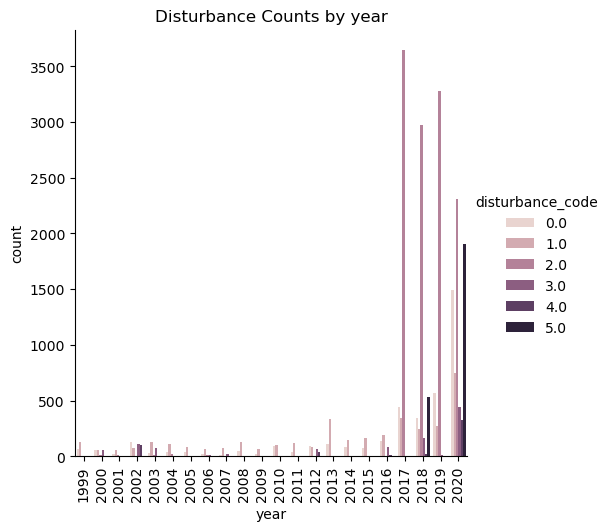

In [68]:
g = sns.catplot(x='year', y='count', hue='disturbance_code', data=grouped_df, kind='bar')
g.set_xticklabels(rotation=90)
plt.title('Disturbance Counts by year')
plt.show()